## Linear regression from scratch

In [256]:
from __future__ import print_function, division
import numpy as np
import math

class l1_regularization():
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * np.linalg.norm(w)

    def grad(self, w):
        return self.alpha * np.sign(w)

class l2_regularization():
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * 0.5 *  w.T.dot(w)

    def grad(self, w):
        return self.alpha * w

    
class LinearRegression(object):
    def __init__(self, n_iterations=100, learning_rate=0.001, regularization="l2", reg_factor=1, degree=1):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.regularization = l2_regularization(alpha=reg_factor)
        self.degree = degree
        
        if regularization=="l1":
            self.regularization = l1_regularization(alpha=reg_factor)

    def initialize_weights(self, n_features):
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, ))
    
    def _polynomial_features(self, X, degree):
        n_samples, n_features = np.shape(X)

        def index_combinations():
            combs = [combinations_with_replacement(range(n_features), i) for i in range(1, degree + 1)]
            flat_combs = [item for sublist in combs for item in sublist]
            return flat_combs
    
        combinations = index_combinations()
        n_output_features = len(combinations)
        X_new = np.empty((n_samples, n_output_features))
    
        for i, index_combs in enumerate(combinations):  
            X_new[:, i] = np.prod(X[:, index_combs], axis=1)

        return X_new
    

    def fit(self, X, y):
        X = self._polynomial_features(X, degree=self.degree)
        X = np.insert(X, 0, 1, axis=1)
        self.training_errors = []
        self.initialize_weights(n_features=X.shape[1])

        # gradient descent
        for i in range(self.n_iterations):
            y_ba = X.dot(self.w)
            mse = np.mean(0.5 * (y - y_ba)**2 + self.regularization(self.w))
            self.training_errors.append(mse)
            grad_w = -X.T.dot(y-y_ba)/X.shape[0] + self.regularization.grad(self.w)
            self.w -= self.learning_rate * grad_w

    def predict(self, X):
        X = self._polynomial_features(X, degree=self.degree)
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred
    


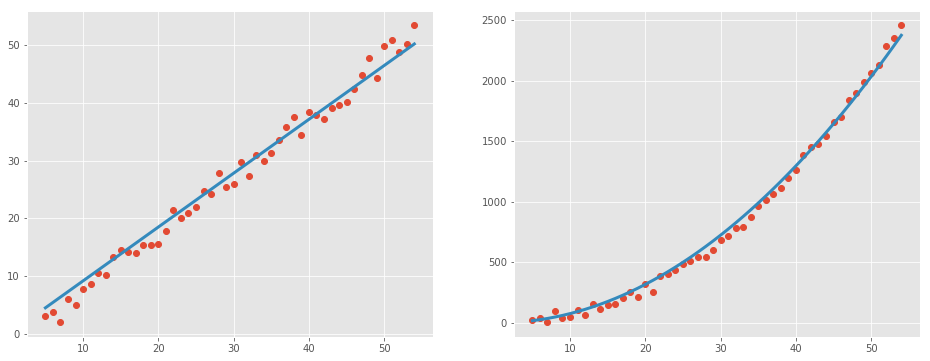

In [269]:
import random
import matplotlib.pyplot as plt
plt.style.use("ggplot")

X = np.array([[i for i in range(50)]]).T +5
y1 = np.array([i + random.uniform(0, 1)*5 for i in range(50)])
y2 = np.array([i**2 + random.uniform(0, 1)*100 for i in range(50)])

lr =LinearRegression(degree=1)
lr.fit(X,y1)
y_pred = lr.predict(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plt.subplot(121)
plt.plot(X, y1, "o")
plt.plot(X, y_pred, lw=3)

lr =LinearRegression(degree=2, learning_rate=1e-6, n_iterations=3000)
lr.fit(X,y2)
y_pred = lr.predict(X)

plt.subplot(122)
plt.plot(X, y2, "o")
plt.plot(X, y_pred, lw=3)
plt.show()